##### Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Standalone Model Card Toolkit Demo

This "standalone" notebook demonstrates using the Model Card Toolkit without the TFX/MLMD context.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/responsible_ai/model_card_toolkit/examples/Standalone_Model_Card_Toolkit_Demo"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/model-card-toolkit/blob/main/model_card_toolkit/documentation/examples/Standalone_Model_Card_Toolkit_Demo.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/model-card-toolkit/blob/main/model_card_toolkit/documentation/examples/Standalone_Model_Card_Toolkit_Demo.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/model-card-toolkit/model_card_toolkit/documentation/examples/Standalone_Model_Card_Toolkit_Demo.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Objective

This notebook demonstrates how to generate a Model Card using the Model Card Toolkit in a Jupyter/Colab environment. You can learn more about model cards at https://modelcards.withgoogle.com/about. 

We are using a Keras model in this demo. But the logic below also applies to other ML frameworks in general.



## Setup
We first need to a) install and import the necessary packages, and b) download the data.

### Upgrade Pip and install the Model Card Toolkit

In [2]:
!pip install --upgrade pip
!pip install 'model-card-toolkit>=1.0.0'
!pip install 'tensorflow>=2.3.1'
!pip install 'tensorflow-datasets>=4.8.2'


  Obtaining dependency information for tensorflow-data-validation<2.0.0,>=1.5.0 from https://files.pythonhosted.org/packages/d6/a6/0ee70ba25674199dc20226f64719bf84b9ce3b3aff2c05e7a765bcdc273c/tensorflow_data_validation-1.14.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata


  Obtaining dependency information for ml-metadata<2.0.0,>=1.5.0 from https://files.pythonhosted.org/packages/e1/59/5b44a61cfdd52f52a0ac9402b3fbd08fe23cfb8d7a4c84a44dd7002edc3a/ml_metadata-1.14.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata


  Obtaining dependency information for apache-beam[gcp]<3,>=2.47 from https://files.pythonhosted.org/packages/47/9c/ec3d6609d396ffd1b6f415e6bedb78874b837e3c47ab1d4472d2b0c5d899/apache_beam-2.50.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata


  Preparing metadata (setup.py) ... -

 done


  Obtaining dependency information for tfx-bsl<1.15,>=1.14.0 from https://files.pythonhosted.org/packages/37/8c/3534124ad7cacc7cd128708fc629f52cd6e58e581f81c15bff13f6e916cb/tfx_bsl-1.14.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata


  Obtaining dependency information for ipywidgets<8,>=7 from https://files.pythonhosted.org/packages/14/3f/fa7fcf85061819f5a10ed09eaef38fe97d0f3f91d14674bbb26c3fc2a622/ipywidgets-7.8.1-py2.py3-none-any.whl.metadata
INFO: pip is looking at multiple versions of tensorflow-model-analysis to determine which version is compatible with other requirements. This could take a while.


INFO: pip is still looking at multiple versions of tensorflow-model-analysis to determine which version is compatible with other requirements. This could take a while.


INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.


  Preparing metadata (setup.py) ... done


  Obtaining dependency information for orjson<4.0 from https://files.pythonhosted.org/packages/cc/b4/324754a9e255295c0b5966f78999822e180a0fa2c22fd96edefac9dd8313/orjson-3.9.7-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata


  Preparing metadata (setup.py) ... -

 done


  Obtaining dependency information for fastavro<2,>=0.23.6 from https://files.pythonhosted.org/packages/a9/2a/af06dcb43345f87b7265211ab95f694a37015c4ae13464778dca5fd017af/fastavro-1.8.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata


  Obtaining dependency information for fasteners<1.0,>=0.3 from https://files.pythonhosted.org/packages/61/bf/fd60001b3abc5222d8eaa4a204cd8c0ae78e75adc688f33ce4bf25b7fafa/fasteners-0.19-py3-none-any.whl.metadata


  Preparing metadata (setup.py) ... -

 done


  Obtaining dependency information for pymongo<5.0.0,>=3.8.0 from https://files.pythonhosted.org/packages/bf/b7/63cebc24f4690b85d0c91fe11a32ad14e791ff499f4054cde8f1a4ea08dc/pymongo-4.5.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata


  Obtaining dependency information for proto-plus<2,>=1.7.1 from https://files.pythonhosted.org/packages/36/5b/e02636d221917d6fa2a61289b3f16002eb4c93d51c0191ac8e896d527182/proto_plus-1.22.3-py3-none-any.whl.metadata


  Obtaining dependency information for regex>=2020.6.8 from https://files.pythonhosted.org/packages/1f/5c/374ac3fa3c7ed9a967ad273a5e841897ef6b10aa6aad938ff10717a3e2a3/regex-2023.8.8-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata


  Obtaining dependency information for google-api-core<3,>=2.0.0 from https://files.pythonhosted.org/packages/4d/ce/4fd62ea66b3508debc795e475336ce915929765870f0ad52328426ba016e/google_api_core-2.12.0-py3-none-any.whl.metadata


  Preparing metadata (setup.py) ... -

 done
  Obtaining dependency information for google-auth-httplib2<0.2.0,>=0.1.0 from https://files.pythonhosted.org/packages/d3/3d/e4991229886c0d522d9552151a43ff7adcc61e026e60ce8bd508387f84cf/google_auth_httplib2-0.1.1-py2.py3-none-any.whl.metadata


  Obtaining dependency information for google-cloud-datastore<3,>=2.0.0 from https://files.pythonhosted.org/packages/e6/e3/9e19e26b4fc61aa64a73d097c9e5ce3b4cbb62d7d0ea2c0554b2105b54d6/google_cloud_datastore-2.18.0-py2.py3-none-any.whl.metadata


  Obtaining dependency information for google-cloud-pubsub<3,>=2.1.0 from https://files.pythonhosted.org/packages/d2/58/fbdedd07206514f09f029458d95d391829b09399c1459d8892e6e20022d1/google_cloud_pubsub-2.18.4-py2.py3-none-any.whl.metadata


  Obtaining dependency information for google-cloud-pubsublite<2,>=1.2.0 from https://files.pythonhosted.org/packages/2d/d6/91f605fc67e9d0b4e419c4f291adff15c2f241bf3d70abe8068688599d60/google_cloud_pubsublite-1.8.3-py2.py3-none-any.whl.metadata


  Obtaining dependency information for google-cloud-bigquery<4,>=2.0.0 from https://files.pythonhosted.org/packages/cc/6a/d0ef792288f2fa2cfea80899a82de302b3332dfda41984fe114e2cfbf700/google_cloud_bigquery-3.11.4-py2.py3-none-any.whl.metadata


  Obtaining dependency information for google-cloud-bigquery-storage<3,>=2.6.3 from https://files.pythonhosted.org/packages/83/eb/e5016412a9c6ac26b46480f83d58112b99b48c0e38ae040b46f8795dea6f/google_cloud_bigquery_storage-2.22.0-py2.py3-none-any.whl.metadata


  Obtaining dependency information for google-cloud-core<3,>=2.0.0 from https://files.pythonhosted.org/packages/a2/40/02045f776fdb6e44194f34b6375a26ce8a61bd9bd03cd8930ed91cf51a62/google_cloud_core-2.3.3-py2.py3-none-any.whl.metadata


  Obtaining dependency information for google-cloud-bigtable<3,>=2.19.0 from https://files.pythonhosted.org/packages/f1/2e/fcdd3aed46825c04bc93c0223fff674059e6a789cfda5374948bea1a3f6e/google_cloud_bigtable-2.21.0-py2.py3-none-any.whl.metadata


  Obtaining dependency information for google-cloud-spanner<4,>=3.0.0 from https://files.pythonhosted.org/packages/fd/77/527bbb6c103ef5e8e0d49d8000e337d3ce4ed66a373af915b0170012de30/google_cloud_spanner-3.40.1-py2.py3-none-any.whl.metadata


  Obtaining dependency information for google-cloud-dlp<4,>=3.0.0 from https://files.pythonhosted.org/packages/9a/2c/5a62598d1696246c056e512ac69983e0d736cd2cd2ac1107075743a4ec48/google_cloud_dlp-3.12.3-py2.py3-none-any.whl.metadata


  Obtaining dependency information for google-cloud-language<3,>=2.0 from https://files.pythonhosted.org/packages/19/4c/8a42006ec29f26d1d0f47f5fdebe7138a700eda8e3668d53ffcb55c9a774/google_cloud_language-2.11.1-py2.py3-none-any.whl.metadata


  Obtaining dependency information for google-cloud-videointelligence<3,>=2.0 from https://files.pythonhosted.org/packages/ca/0e/ce99f6c36d5e7ccbc5827d714a947da5b864a30e060f2e5dddad4166f663/google_cloud_videointelligence-2.11.4-py2.py3-none-any.whl.metadata


  Obtaining dependency information for google-cloud-vision<4,>=2 from https://files.pythonhosted.org/packages/14/16/e3ea36b6989e0cff58c2cc38261b9b5133a58d1fb08d64fb85fc552f3466/google_cloud_vision-3.4.4-py2.py3-none-any.whl.metadata


  Obtaining dependency information for google-cloud-recommendations-ai<0.11.0,>=0.1.0 from https://files.pythonhosted.org/packages/f9/7f/c6554fcbc09a861e11214df359c1d048791c8a2d6b8909be023ba5fe0997/google_cloud_recommendations_ai-0.10.5-py2.py3-none-any.whl.metadata


  Obtaining dependency information for google-cloud-aiplatform<2.0,>=1.26.0 from https://files.pythonhosted.org/packages/20/ee/af1e3c9cb2bed3aa91297f8362da3879a793d2555c2e587a9c3d2f1ed900/google_cloud_aiplatform-1.34.0-py2.py3-none-any.whl.metadata


  Obtaining dependency information for widgetsnbextension~=3.6.6 from https://files.pythonhosted.org/packages/9c/a0/ba2634cd75b7d7f8f9aeb38edf854cd6c9877ec064013a62630b4541b88f/widgetsnbextension-3.6.6-py2.py3-none-any.whl.metadata


  Obtaining dependency information for jupyterlab-widgets<3,>=1.0.0 from https://files.pythonhosted.org/packages/06/c9/50a16b6e7410d661ea16160f8c650c444ab83740b437b3c202ca7d8e2b73/jupyterlab_widgets-1.1.7-py3-none-any.whl.metadata


  Obtaining dependency information for tensorflow-serving-api!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15 from https://files.pythonhosted.org/packages/14/d7/11e3d0a3f6c50a38e05550be85e35ca1f1bfd85219977b18694367c5688f/tensorflow_serving_api-2.13.1-py2.py3-none-any.whl.metadata


  Obtaining dependency information for google-cloud-storage<3.0.0dev,>=1.32.0 from https://files.pythonhosted.org/packages/3a/9f/7923b9e460023470826d124156503359bf77ee130adb0872570599e8cd98/google_cloud_storage-2.11.0-py2.py3-none-any.whl.metadata


  Obtaining dependency information for google-cloud-resource-manager<3.0.0dev,>=1.3.3 from https://files.pythonhosted.org/packages/8b/9c/6807473e69fddc9bf33413b7db966fbcfeb0deade2f5ed324cef2b98ec16/google_cloud_resource_manager-1.10.4-py2.py3-none-any.whl.metadata


  Obtaining dependency information for google-resumable-media<3.0dev,>=0.6.0 from https://files.pythonhosted.org/packages/c7/4f/b8e5e22406e5aeafa46df8799939d5eeee52f18eeed339675167fac6603a/google_resumable_media-2.6.0-py2.py3-none-any.whl.metadata


  Obtaining dependency information for grpcio-status>=1.33.2 from https://files.pythonhosted.org/packages/55/ce/e6d0382610240439ced22fe2183bcc387946bf80e5e0f17f5b5250978ff3/grpcio_status-1.59.0-py3-none-any.whl.metadata


  Preparing metadata (setup.py) ... - done


  Obtaining dependency information for dnspython<3.0.0,>=1.16.0 from https://files.pythonhosted.org/packages/f6/b4/0a9bee52c50f226a3cbfb54263d02bb421c7f2adc136520729c2c689c1e5/dnspython-2.4.2-py3-none-any.whl.metadata


INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for grpcio-status>=1.33.2 from https://files.pythonhosted.org/packages/f6/48/2bcf11bc2df159564eac099ea38d80663d291a56fa2f2f561d08bf083dfa/grpcio_status-1.58.0-py3-none-any.whl.metadata
  Obtaining dependency information for grpcio-status>=1.33.2 from https://files.pythonhosted.org/packages/d0/3f/347d93056572fdbd64d4f0fc58a18d420763a7118f8b177437d9dab0ae6f/grpcio_status-1.57.0-py3-none-any.whl.metadata


  Obtaining dependency information for grpcio-status>=1.33.2 from https://files.pythonhosted.org/packages/ef/16/3018689d96918e9c4c7407adf96b721df4d6748ba65db82c5eaa63564335/grpcio_status-1.56.2-py3-none-any.whl.metadata
  Obtaining dependency information for grpcio-status>=1.33.2 from https://files.pythonhosted.org/packages/2b/21/aaff30111c5941fd9adb5abbf06e04a0e491a685f48ffb291f72ad595ec7/grpcio_status-1.56.0-py3-none-any.whl.metadata


  Obtaining dependency information for grpcio-status>=1.33.2 from https://files.pythonhosted.org/packages/b6/c8/0efd0cf1ff62b3acc28619b9ba80a6ead4eb0ee42bb1c3b3841610af98a7/grpcio_status-1.55.3-py3-none-any.whl.metadata
  Obtaining dependency information for grpcio-status>=1.33.2 from https://files.pythonhosted.org/packages/b9/ad/51cf59eb26ffa5360ba9dc318580b777e5dda1aa344ad34475103d97e5ac/grpcio_status-1.54.3-py3-none-any.whl.metadata


  Obtaining dependency information for grpcio-status>=1.33.2 from https://files.pythonhosted.org/packages/5f/06/19520e0c6ab22fe09a0c8cfeabdf63b1ce6ea5d6ac88a65a2fa57b080976/grpcio_status-1.54.2-py3-none-any.whl.metadata
INFO: pip is still looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.


  Obtaining dependency information for grpcio-status>=1.33.2 from https://files.pythonhosted.org/packages/fb/c0/8ee53675cb1aecaa7fcbc9bea6575cb8c19a21dd0ce80fe6e5edb04426f4/grpcio_status-1.53.2-py3-none-any.whl.metadata


  Obtaining dependency information for grpcio-status>=1.33.2 from https://files.pythonhosted.org/packages/61/14/6a4476403abaf954c0b5715de9cfdb7528143c5ac372316fa95704ae8551/grpcio_status-1.53.1-py3-none-any.whl.metadata


INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.


INFO: pip is looking at multiple versions of jupyterlab-server to determine which version is compatible with other requirements. This could take a while.


  Obtaining dependency information for jupyterlab-server<3,>=2.22.1 from https://files.pythonhosted.org/packages/a7/0d/6d4eab0391bd4df1c43f308368d5e177b0fa8ac632267222a23b71317091/jupyterlab_server-2.24.0-py3-none-any.whl.metadata


  Obtaining dependency information for jupyterlab-server<3,>=2.22.1 from https://files.pythonhosted.org/packages/cb/14/8f1c4b9b80db855d48a762e248efd41649d102841b6bfadbd26b8c25e054/jupyterlab_server-2.23.0-py3-none-any.whl.metadata


  Obtaining dependency information for jupyterlab<5,>=4.0.2 from https://files.pythonhosted.org/packages/3b/43/2368d8ffee6e33f282f548d42fa222bd385cc9f66545b260e7d08e90046b/jupyterlab-4.0.6-py3-none-any.whl.metadata
  Using cached jupyterlab-4.0.6-py3-none-any.whl.metadata (15 kB)
INFO: pip is still looking at multiple versions of jupyterlab-server to determine which version is compatible with other requirements. This could take a while.


  Obtaining dependency information for notebook>=4.4.1 from https://files.pythonhosted.org/packages/29/e0/50b48473fcb99651dd21302da50ae2c49113ccf3dfb901fc6aaa3117e7ed/notebook-7.0.4-py3-none-any.whl.metadata
  Using cached notebook-7.0.4-py3-none-any.whl.metadata (10 kB)


  Obtaining dependency information for notebook>=4.4.1 from https://files.pythonhosted.org/packages/79/97/b803f9686fe25b40c8eca2d1ba440b2f878f23b87765d18fe93dd323f0b7/notebook-7.0.3-py3-none-any.whl.metadata


INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Obtaining dependency information for notebook>=4.4.1 from https://files.pythonhosted.org/packages/85/76/51777158391e1784cc5a892ff355fd0a0b0b5189aeffce9baf51f514b9a2/notebook-7.0.2-py3-none-any.whl.metadata


  Obtaining dependency information for notebook>=4.4.1 from https://files.pythonhosted.org/packages/c6/3a/171eaf5808d22b97fc98c61f2dd484302d1f38dbe0952e536dbaa88c2320/notebook-7.0.1-py3-none-any.whl.metadata


  Obtaining dependency information for notebook>=4.4.1 from https://files.pythonhosted.org/packages/b6/7a/9a32d2c8a2652614f66ee889f67c352fa11e1042e668de3224c4da2370db/notebook-7.0.0-py3-none-any.whl.metadata


  Obtaining dependency information for notebook>=4.4.1 from https://files.pythonhosted.org/packages/f2/b0/24277b431a62f50e85ae5f7cad478419ed9645f4ba1dd035f2ce11326777/notebook-6.5.6-py3-none-any.whl.metadata


INFO: pip is looking at multiple versions of jsonschema[format-nongpl] to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for jsonschema[format-nongpl]>=4.18.0 from https://files.pythonhosted.org/packages/2b/ff/af59fd34bc4d7ac3e6e0cd1f3c10317d329b6c1aee179e8b24ad9a79fbac/jsonschema-4.19.0-py3-none-any.whl.metadata


  Obtaining dependency information for jsonschema[format-nongpl]>=4.18.0 from https://files.pythonhosted.org/packages/b5/5c/ae834dd4160bbe9a4feb6e1f3e6189ab7772408823e294bd12eb6b4b4f44/jsonschema-4.18.6-py3-none-any.whl.metadata


  Obtaining dependency information for jsonschema[format-nongpl]>=4.18.0 from https://files.pythonhosted.org/packages/d3/a4/54273ac37a667c3fcf93916fda59b36f0ad79950e4e56ad839ef2e3e1159/jsonschema-4.18.5-py3-none-any.whl.metadata


  Obtaining dependency information for jsonschema[format-nongpl]>=4.18.0 from https://files.pythonhosted.org/packages/a1/ba/28ce987450c6afa8336373761193ddaadc1ba2004fbf23a6407db036f558/jsonschema-4.18.4-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema[format-nongpl]>=4.18.0 from https://files.pythonhosted.org/packages/3a/34/ea34f7979d4f9ed1fa3b5c66000bc4e445c570f642ad478796f5ebaae45a/jsonschema-4.18.3-py3-none-any.whl.metadata


  Obtaining dependency information for jsonschema[format-nongpl]>=4.18.0 from https://files.pythonhosted.org/packages/03/83/9a89e40dba1498ce9777865fa0bec0bfc3c1831679cdee814ec8dd223904/jsonschema-4.18.2-py3-none-any.whl.metadata


  Obtaining dependency information for jsonschema[format-nongpl]>=4.18.0 from https://files.pythonhosted.org/packages/1d/85/984ef667a097ce4e671c6a5d8251a2b4a80845922a3937c6e77c8e6954f7/jsonschema-4.18.1-py3-none-any.whl.metadata


INFO: pip is still looking at multiple versions of jsonschema[format-nongpl] to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for jsonschema[format-nongpl]>=4.18.0 from https://files.pythonhosted.org/packages/8a/38/2c55180702a637be0fbb8aa95358213a750d25cad3e59869726a54309996/jsonschema-4.18.0-py3-none-any.whl.metadata


  Obtaining dependency information for jupyter-events>=0.6.0 from https://files.pythonhosted.org/packages/15/0d/3c67f6c432d8085a3cee250e1e235f27b764be90cc2d16fdcc0b1cee9572/jupyter_events-0.7.0-py3-none-any.whl.metadata
  Using cached jupyter_events-0.7.0-py3-none-any.whl.metadata (5.5 kB)


INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.


 \

 |

 /

 done
  Created wheel for pyfarmhash: filename=pyfarmhash-0.3.2-cp38-cp38-linux_x86_64.whl size=101844 sha256=ff0d70168c57815247b08721525a2951e399d7b2ee719ecf8cfcca3f4e02431f
  Stored in directory: /home/kbuilder/.cache/pip/wheels/ef/32/a2/5f89be144e6e691c3566245279d78d89253e2d3414a842cd35


 done
  Created wheel for crcmod: filename=crcmod-1.7-cp38-cp38-linux_x86_64.whl size=36037 sha256=b11270fe580b1a3cff710b5669ca0c9d024c528cd33eb698c318f0f5aead1f39
  Stored in directory: /home/kbuilder/.cache/pip/wheels/ca/5a/02/f3acf982a026f3319fb3e798a8dca2d48fafee7761788562e9


 \

 done
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78542 sha256=8378c44c130aefd1789f7696034788fa3d056678bea63dbebf701f86a7291c0a
  Stored in directory: /home/kbuilder/.cache/pip/wheels/07/35/78/e9004fa30578734db7f10e7a211605f3f0778d2bdde38a239d


 \

 done
  Created wheel for google-apitools: filename=google_apitools-0.5.31-py3-none-any.whl size=131015 sha256=4c927502a9b8919b17b0891189af320f5fa25df0d131a239c6cc0e3192a4e757
  Stored in directory: /home/kbuilder/.cache/pip/wheels/d7/54/79/85de1824f2f4175fb4960c72afb10045d86700c3941dc73685


 \

 done
  Created wheel for hdfs: filename=hdfs-2.7.2-py3-none-any.whl size=34168 sha256=330479073278bc08d4cbf651d4449f590d7c1d3cfc2c208f101a899c571b53d7
  Stored in directory: /home/kbuilder/.cache/pip/wheels/fc/d2/5e/77127327c6af94d8057fd8c4e896fbec0bb2b752bdc954bc5e


 done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=9237eb50c835be13abdb3400f2e3f1411fe2b35270e54da460c3f3e2079569e2
  Stored in directory: /home/kbuilder/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built pyfarmhash crcmod dill google-apitools hdfs docopt


  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2


    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2


  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 25.1.1


    Uninstalling pyzmq-25.1.1:
      Successfully uninstalled pyzmq-25.1.1


  Attempting uninstall: overrides
    Found existing installation: overrides 7.4.0
    Uninstalling overrides-7.4.0:
      Successfully uninstalled overrides-7.4.0
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.9
    Uninstalling jupyterlab-widgets-3.0.9:
      Successfully uninstalled jupyterlab-widgets-3.0.9


  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0


  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


  Attempting uninstall: tensorflow-metadata
    Found existing installation: tensorflow-metadata 1.14.0
    Uninstalling tensorflow-metadata-1.14.0:
      Successfully uninstalled tensorflow-metadata-1.14.0


  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3


    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3


  Attempting uninstall: jupyter-client
    Found existing installation: jupyter_client 8.3.1
    Uninstalling jupyter_client-8.3.1:
      Successfully uninstalled jupyter_client-8.3.1


  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 4.19.1


    Uninstalling jsonschema-4.19.1:
      Successfully uninstalled jsonschema-4.19.1
  Attempting uninstall: ipython
    Found existing installation: ipython 8.12.3


    Uninstalling ipython-8.12.3:
      Successfully uninstalled ipython-8.12.3


  Attempting uninstall: jupyter-events
    Found existing installation: jupyter-events 0.7.0
    Uninstalling jupyter-events-0.7.0:
      Successfully uninstalled jupyter-events-0.7.0


  Attempting uninstall: notebook
    Found existing installation: notebook 7.0.4


    Uninstalling notebook-7.0.4:
      Successfully uninstalled notebook-7.0.4


  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 4.0.9
    Uninstalling widgetsnbextension-4.0.9:
      Successfully uninstalled widgetsnbextension-4.0.9


  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 8.1.1
    Uninstalling ipywidgets-8.1.1:
      Successfully uninstalled ipywidgets-8.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-server 2.25.0 requires jsonschema>=4.18.0, but you have jsonschema 3.2.0 which is incompatible.
referencing 0.30.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
scikit-learn 1.3.1 requires joblib>=1.1.1, but you have joblib 0.14.1 which is incompatible.


#### Did you restart the runtime?

If you are using Google Colab, the first time that you run the cell above, you must restart the runtime (Runtime > Restart runtime ...). This is because of the way that Colab loads packages.

### Imports

In [3]:
import tensorflow as tf
import numpy as np
import model_card_toolkit as mct
from model_card_toolkit.documentation.examples import cats_vs_dogs
from model_card_toolkit.utils.graphics import figure_to_base64str
import tempfile
import matplotlib.pyplot as plt
from IPython import display
import requests
import os
import zipfile

## Model

We will use a pretrained model with architecture based off [MobileNetV2](https://arxiv.org/abs/1801.04381), a popular 16-layer image classification model. Our model has been trained to distinguish between betweens cats and dogs using the [Cats vs Dogs](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs) dataset. The model training was based on the [TensorFlow transfer learning tutorial](https://www.tensorflow.org/tutorials/images/transfer_learning). 

In [4]:
URL = 'https://storage.googleapis.com/cats_vs_dogs_model/cats_vs_dogs_model.zip'
BASE_PATH = tempfile.mkdtemp()
ZIP_PATH = os.path.join(BASE_PATH, 'cats_vs_dogs_model.zip')
MODEL_PATH = os.path.join(BASE_PATH,'cats_vs_dogs_model')

r = requests.get(URL, allow_redirects=True)
open(ZIP_PATH, 'wb').write(r.content)

with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(BASE_PATH)

model = tf.keras.models.load_model(MODEL_PATH)

2023-10-03 09:12:20.736066: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Dataset

In the cats-vs-dogs dataset, label=0 corresponds to cats while label=1 corresponds to dogs.

In [5]:
def compute_accuracy(data):
  x = np.stack(data['examples'])
  y = np.asarray(data['labels'])
  _, metric = model.evaluate(x, y)
  return metric

In [6]:
examples = cats_vs_dogs.get_data()
print('num validation examples:', len(examples['combined']['examples']))
print('num cat examples:', len(examples['cat']['examples']))
print('num dog examples:', len(examples['dog']['examples']))

num validation examples: 320
num cat examples: 149
num dog examples: 171


2023-10-03 09:12:30.081069: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [7]:
accuracy = compute_accuracy(examples['combined'])
cat_accuracy = compute_accuracy(examples['cat'])
dog_accuracy = compute_accuracy(examples['dog'])

 1/10 [==>...........................] - ETA: 7s - loss: 0.0225 - binary_accuracy: 1.0000

 2/10 [=====>........................] - ETA: 0s - loss: 0.0216 - binary_accuracy: 1.0000

 3/10 [========>.....................] - ETA: 0s - loss: 0.0276 - binary_accuracy: 0.9896

 4/10 [===========>..................] - ETA: 0s - loss: 0.0739 - binary_accuracy: 0.9844

 5/10 [==============>...............] - ETA: 0s - loss: 0.0724 - binary_accuracy: 0.9812

 6/10 [=================>............] - ETA: 0s - loss: 0.0658 - binary_accuracy: 0.9844

 7/10 [====================>.........] - ETA: 0s - loss: 0.0616 - binary_accuracy: 0.9866

 8/10 [=======================>......] - ETA: 0s - loss: 0.0834 - binary_accuracy: 0.9805

 9/10 [==========================>...] - ETA: 0s - loss: 0.0858 - binary_accuracy: 0.9792

10/10 [==============================] - ETA: 0s - loss: 0.0794 - binary_accuracy: 0.9812

10/10 [==============================] - 2s 77ms/step - loss: 0.0794 - binary_accuracy: 0.9812


1/5 [=====>........................] - ETA: 3s - loss: 0.0283 - binary_accuracy: 1.0000

2/5 [===========>..................] - ETA: 0s - loss: 0.1055 - binary_accuracy: 0.9844

3/5 [=================>............] - ETA: 0s - loss: 0.0742 - binary_accuracy: 0.9896

4/5 [=======================>......] - ETA: 0s - loss: 0.0657 - binary_accuracy: 0.9922

5/5 [==============================] - ETA: 0s - loss: 0.0608 - binary_accuracy: 0.9933

5/5 [==============================] - 1s 74ms/step - loss: 0.0608 - binary_accuracy: 0.9933


1/6 [====>.........................] - ETA: 0s - loss: 0.0144 - binary_accuracy: 1.0000

2/6 [=========>....................] - ETA: 0s - loss: 0.0429 - binary_accuracy: 0.9844

3/6 [==============>...............] - ETA: 0s - loss: 0.0575 - binary_accuracy: 0.9792

4/6 [===================>..........] - ETA: 0s - loss: 0.0777 - binary_accuracy: 0.9766

5/6 [========================>.....] - ETA: 0s - loss: 0.0998 - binary_accuracy: 0.9688

6/6 [==============================] - 0s 65ms/step - loss: 0.0956 - binary_accuracy: 0.9708


## Use the Model Card Toolkit

### Initialize the Model Card Toolkit

The first step is to initialize a `ModelCardToolkit` object, which maintains assets including a [model card JSON file](https://github.com/tensorflow/model-card-toolkit/tree/master/model_card_toolkit/schema/) and [model card document](https://github.com/tensorflow/model-card-toolkit/tree/master/model_card_toolkit/template). Call `ModelCardToolkit.scaffold_assets()` to generate these assets and return a `ModelCard` object.

In [8]:
# https://github.com/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/model_card_toolkit.py
model_card_dir = tempfile.mkdtemp()
toolkit = mct.ModelCardToolkit(model_card_dir)

# https://github.com/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/model_card.py
model_card = toolkit.scaffold_assets()

### Annotate the Model Card

The `ModelCard` object returned by `scaffold_assets()` has many fields that can be directly modified. These fields are rendered in the final generated Model Card document. For a comprehensive list, see [model_card.py](https://github.com/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/model_card.py). See [the documentation](https://github.com/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/documentation/guide/concepts.md) for more details.


#### Text Fields

##### Model Details

`model_card.model_details` contains many basic metadata fields such as `name`, `owners`, and `version`. You can provide a description for your model in the `overview` field.

In [9]:
model_card.model_details.name = 'Fine-tuned MobileNetV2 Model for Cats vs. Dogs'
model_card.model_details.overview = (
    'This model distinguishes cat and dog images. It uses the MobileNetV2 '
    'architecture (https://arxiv.org/abs/1801.04381) and is trained on the '
    'Cats vs Dogs dataset '
    '(https://www.tensorflow.org/datasets/catalog/cats_vs_dogs). This model '
    'performed with high accuracy on both Cat and Dog images.'
)
model_card.model_details.owners = [
  mct.Owner(name='Model Cards Team', contact='model-cards@google.com')
]
model_card.model_details.version = mct.Version(name='v1.0', date='08/28/2020')
model_card.model_details.references = [
    mct.Reference(reference='https://www.tensorflow.org/guide/keras/transfer_learning'),
    mct.Reference(reference='https://arxiv.org/abs/1801.04381'),
]
model_card.model_details.licenses = [mct.License(identifier='Apache-2.0')]
model_card.model_details.citations = [mct.Citation(citation='https://github.com/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/documentation/examples/Standalone_Model_Card_Toolkit_Demo.ipynb')]

##### Quantitative Analysis

`model_card.quantitative_analysis` contains information about a model's performance metrics.

Below, we create some synthetic performance metric values for a hypothetical model built on our dataset.

In [10]:
model_card.quantitative_analysis.performance_metrics = [
  mct.PerformanceMetric(type='accuracy', value=str(accuracy)),
  mct.PerformanceMetric(type='accuracy', value=str(cat_accuracy), slice='cat'),
  mct.PerformanceMetric(type='accuracy', value=str(dog_accuracy), slice='Dog'),
]

##### Considerations

`model_card.considerations` contains qualifying information about your model - what are the appropriate use cases, what are limitations that users should keep in mind, what are the ethical considerations of application, etc.

In [11]:
model_card.considerations.use_cases = [
    mct.UseCase(description='This model classifies images of cats and dogs.')
]
model_card.considerations.limitations = [
    mct.Limitation(description='This model is not able to classify images of other classes.')
]
model_card.considerations.ethical_considerations = [mct.Risk(
    name=
        'While distinguishing between cats and dogs is generally agreed to be '
        'a benign application of machine learning, harmful results can occur '
        'when the model attempts to classify images that don’t contain cats or '
        'dogs.',
    mitigation_strategy=
        'Avoid application on non-dog and non-cat images.'
)]

#### Graph Fields

It's often best practice for a report to provide information on a model's training data, and its performance across evaluation data. Model Card Toolkit allows users to encode this information in visualizations, rendered in the Model Card.

`model_card` has three sections for graphs -- `model_card.model_parameters.data.train.graphics` for training dataset statistics, `model_card.model_parameters.data.eval.graphics` for evaluation dataset statistics, and `model_card.quantitative_analysis.graphics` for quantitative analysis of model performance.

Graphs are stored as [base64 strings](https://en.wikipedia.org/wiki/Base64). If you have a [matplotlib](https://pypi.org/project/matplotlib/) figure, you can convert it to a base64 string with `model_card_toolkit.utils.graphics.figure_to_base64str()`.

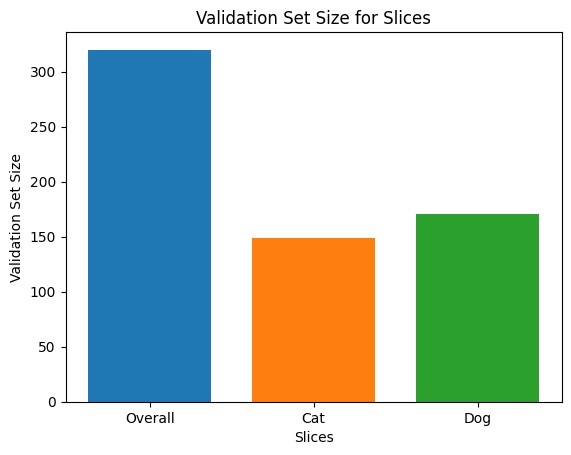

In [12]:
# Validation Set Size Bar Chart
fig, ax = plt.subplots()
width = 0.75
rects0 = ax.bar(0, len(examples['combined']['examples']), width, label='Overall')
rects1 = ax.bar(1, len(examples['cat']['examples']), width, label='Cat')
rects2 = ax.bar(2, len(examples['dog']['examples']), width, label='Dog')
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['Overall', 'Cat', 'Dog'])
ax.set_ylabel('Validation Set Size')
ax.set_xlabel('Slices')
ax.set_title('Validation Set Size for Slices')
validation_set_size_barchart = figure_to_base64str(fig)

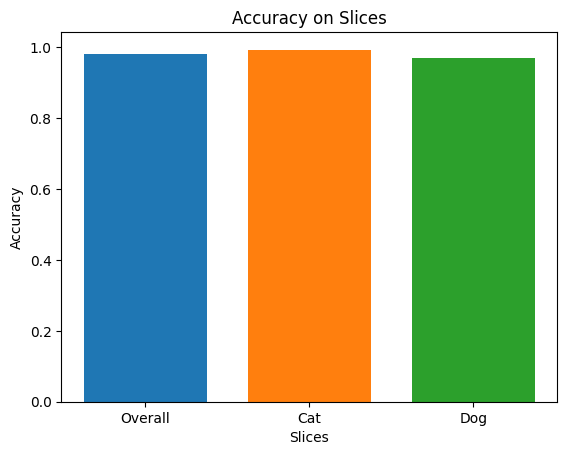

In [13]:
# Acuracy Bar Chart
fig, ax = plt.subplots()
width = 0.75
rects0 = ax.bar(0, accuracy, width, label='Overall')
rects1 = ax.bar(1, cat_accuracy, width, label='Cat')
rects2 = ax.bar(2, dog_accuracy, width, label='Dog')
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['Overall', 'Cat', 'Dog'])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Slices')
ax.set_title('Accuracy on Slices')
accuracy_barchart = figure_to_base64str(fig)

Now we can add them to our `ModelCard`.

In [14]:
model_card.model_parameters.data.append(mct.Dataset())
model_card.model_parameters.data[0].graphics.collection = [
  mct.Graphic(name='Validation Set Size', image=validation_set_size_barchart),
]
model_card.quantitative_analysis.graphics.collection = [
  mct.Graphic(name='Accuracy', image=accuracy_barchart),
]

### Generate the Model Card
Let's generate the Model Card document. Available formats are stored at [model_card_toolkit/template](https://github.com/tensorflow/model-card-toolkit/tree/master/model_card_toolkit/template). Here, we will demonstrate the HTML and Markdown formats.

First, we need to update the `ModelCardToolkit` with the latest `ModelCard`.

In [15]:
toolkit.update_model_card(model_card)

Now, the `ModelCardToolkit` can generate a Model Card document with `ModelCardToolkit.export_format()`.


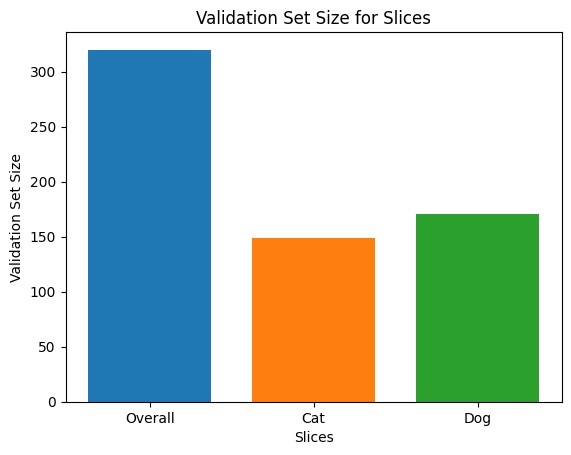
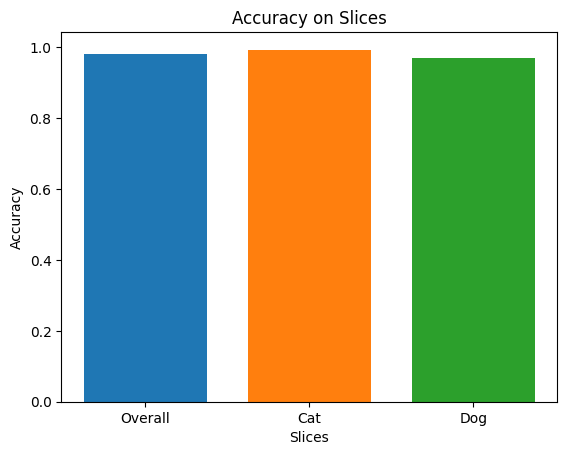

In [16]:
# Generate a model card document in HTML (default)
html_doc = toolkit.export_format()

# Display the model card document in HTML
display.display(display.HTML(html_doc))

You can also output a Model Card in other formats, like Markdown.







# Model Card for Fine-tuned MobileNetV2 Model for Cats vs. Dogs

## Model Details

### Overview
This model distinguishes cat and dog images. It uses the MobileNetV2 architecture (https://arxiv.org/abs/1801.04381) and is trained on the Cats vs Dogs dataset (https://www.tensorflow.org/datasets/catalog/cats_vs_dogs). This model performed with high accuracy on both Cat and Dog images. 

### Version

name: v1.0  

date: 08/28/2020  

### Owners

* Model Cards Team, model-cards@google.com


### Licenses

* Apache-2.0

### References

* [https://www.tensorflow.org/guide/keras/transfer_learning](https://www.tensorflow.org/guide/keras/transfer_learning)
* [https://arxiv.org/abs/1801.04381](https://arxiv.org/abs/1801.04381)


### Citations

* https://github.com/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/documentation/examples/Standalone_Model_Card_Toolkit_Demo.ipynb



## Considerations

### Use Cases

* This model classifies images of cats and dogs.


### Limitations

* This model is not able to classify images of other classes.


### Ethical Considerations

* Risk: While distinguishing between cats and dogs is generally agreed to be a benign application of machine learning, harmful results can occur when the model attempts to classify images that don’t contain cats or dogs.
  * Mitigation Strategy: Avoid application on non-dog and non-cat images.

## Graphics
  
### Validation Set Size
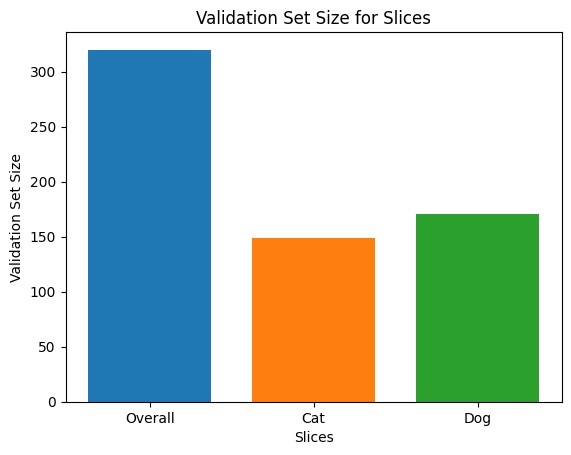


  
### Accuracy
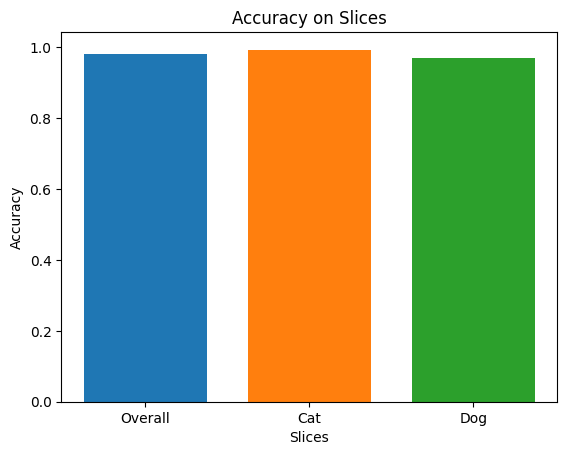


## Metrics

|Name|Value|
-----|------
|accuracy|0.981249988079071|
|accuracy, cat|0.9932885766029358|
|accuracy, Dog|0.9707602262496948|



In [17]:
# Generate a model card document in Markdown
md_path = os.path.join(model_card_dir, 'template/md/default_template.md.jinja')
md_doc = toolkit.export_format(template_path=md_path, output_file='model_card.md')

# Display the model card document in Markdown
display.display(display.Markdown(md_doc))